In [17]:
# Author - Angad Singh

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [5]:
#Load Dataset
dataset= "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
col = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data= pd.read_csv(dataset, header=None, names=col)
data.head()

,ID,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#  Data Exploration and Preprocessing
data.drop('ID', axis=1, inplace=True)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
data.isnull().sum()
x = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Train the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
# Step 5: Evaluate the classifier

y_pred = classifier.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
confusion_mat= confusion_matrix(y_test, y_pred)
evaluation_report = classification_report(y_test, y_pred)

print(f"accfor model: {accuracy}")
print(f"Confusion Matrix for model:\n{confusion_mat}")
print(f"Classification Report for model:\n{evaluation_report }")


accfor model: 0.9649122807017544
Confusion Matrix for model:
[[109   3]
 [  3  56]]
Classification Report for model:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       112
           1       0.95      0.95      0.95        59

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



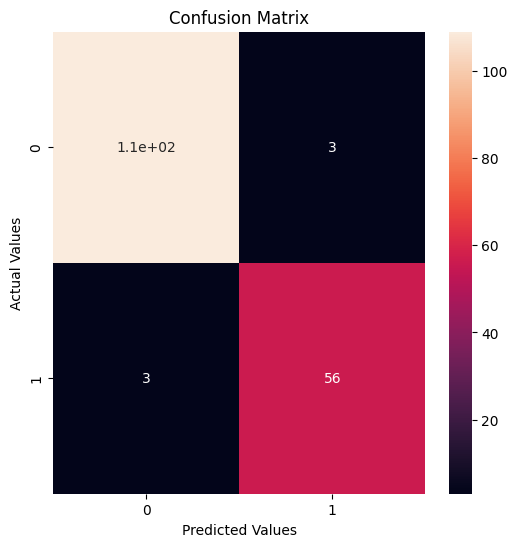

<Figure size 640x480 with 0 Axes>

In [16]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6,6))
sns.heatmap(confusion_mat, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
plt.tight_layout()
